In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import joblib

In [4]:
# standardize the data.
ss_X = StandardScaler()
X_ss = ss_X.fit_transform(X)
ss_y = StandardScaler()
y_ss = ss_y.fit_transform(np.array(y).reshape(-1, 1))
X_ss = pd.DataFrame(X_ss, columns=["alpha1", "alpha2", "alpha3", "alpha4", "alpha5", "alpha6", "alpha7"])
y_ss = pd.DataFrame(y_ss, columns=["return"])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, np.ravel(y_ss), random_state=10)

In [6]:
rfr = RandomForestRegressor()
parameters = {'n_estimators': range(30,80,10),'max_depth':range(3,10,2),
              'min_samples_leaf':[5,6,7],'max_features':[1,2,3], "random_state": [10, 100, 1000]}
grid_search = GridSearchCV(rfr,parameters,cv=10)
grid_search.fit(X_train,y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Test set score:0.04
Best parameters:{'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 7, 'n_estimators': 70, 'random_state': 10}
Best score on train set:0.05


In [7]:
from IPython.display import Image
from sklearn import tree
import pydot
from sklearn.tree import export_graphviz

In [8]:
rfr_best = RandomForestRegressor(max_depth=9, max_features=1, min_samples_leaf=7, n_estimators=70, random_state=10)
rfr_best.fit(X_train, y_train)
Estimators = rfr_best.estimators_

for index, model in enumerate(Estimators):
    # Save the tree as a png image
    export_graphviz(model, out_file = r'tree/tree{}.dot'.format(index), feature_names = X_train.columns, rounded = True, precision = 1)
    (graph, ) = pydot.graph_from_dot_file(r'tree/tree{}.dot'.format(index))
    graph.write_png(r'tree/tree{}.png'.format(index))

Text(0, 0.5, 'Price')

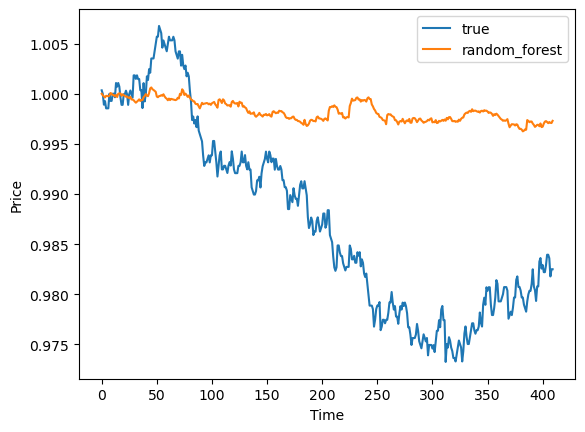

In [9]:
y_pre = ss_y.inverse_transform(rfr_best.predict(X_test).reshape(-1, 1))
cash = [[1], [1]]
for i in range(len(y_test)):
    cash[0].append(cash[0][-1]*(1 + ss_y.inverse_transform(y_test.reshape(-1, 1))[i]))
    cash[1].append(cash[1][-1]*(1 + y_pre[i]))
plt.plot(range(len(y_test)), cash[0][1:], label = "true")
plt.plot(range(len(y_test)), cash[1][1:], label = "random_forest")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")

In [10]:
import joblib
joblib.dump(rfr_best, 'saved_model/rfr.pkl')

['saved_model/rfr.pkl']